<a href="https://colab.research.google.com/github/Ariechovi/kaggle_results/blob/main/%E8%AF%AD%E4%B9%89%E5%88%86%E5%89%B2%E6%95%B0%E6%8D%AE%E9%9B%86Pascal%20VOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successful

In [1]:
%matplotlib inline
import os
import torch
import torchvision
from d2l import torch as d2l

In [2]:
d2l.DATA_HUB['voc2012'] = (d2l.DATA_URL + 'VOCtrainval_11-May-2012.tar',
                           '4e443f8a2eca6b1dac8a6c57641b67dd40621a49')

voc_dir = d2l.download_extract('voc2012', 'VOCdevkit/VOC2012')

In [3]:
print(voc_dir)

../data/VOCdevkit/VOC2012


In [25]:
def read_voc_images(voc_dir, is_train=True):

    #根据训练模式和验证模式选择不同数据集
    txt_fname = os.path.join(voc_dir, 'ImageSets', 'Segmentation',
                             'train.txt' if is_train else 'val.txt')

    #彩色图片[通道数,高度,宽度]
    mode = torchvision.io.image.ImageReadMode.RGB
    #打开刚刚的txt文件 读取图像名称
    with open(txt_fname,'r') as f:
        images=f.read().split()

    #存储原始图像和标签图像
    features, labels = [], []

    for i, fname in enumerate(images):
        #用来训练的feature
        features.append(torchvision.io.read_image(os.path.join(
            voc_dir, 'JPEGImages', f'{fname}.jpg')))
        #对每一个像素用label--存成图片-存的就是每个像素的RGB值
        labels.append(torchvision.io.read_image(os.path.join(
            voc_dir, 'SegmentationClass' ,f'{fname}.png'), mode))

    return features, labels

train_features, train_labels = read_voc_images(voc_dir, True)
print(train_features)

[tensor([[[131, 131, 131,  ..., 182, 182, 182],
         [132, 132, 133,  ..., 183, 183, 182],
         [133, 133, 134,  ..., 183, 183, 182],
         ...,
         [  6,   5,   7,  ...,  16,  16,  16],
         [  5,   9,  12,  ...,  16,  17,  17],
         [  5,   6,  10,  ...,  16,  12,  17]],

        [[193, 193, 193,  ..., 232, 232, 232],
         [194, 194, 195,  ..., 233, 233, 232],
         [195, 195, 196,  ..., 233, 233, 232],
         ...,
         [ 15,  14,  13,  ...,  34,  34,  34],
         [ 14,  18,  17,  ...,  34,  35,  35],
         [ 15,  16,  18,  ...,  33,  29,  34]],

        [[208, 208, 208,  ..., 241, 241, 241],
         [209, 209, 210,  ..., 242, 242, 241],
         [210, 210, 211,  ..., 242, 242, 241],
         ...,
         [ 14,  13,  13,  ...,  38,  38,  38],
         [ 13,  17,  20,  ...,  38,  39,  39],
         [ 14,  15,  20,  ...,  40,  36,  41]]], dtype=torch.uint8), tensor([[[164, 170, 171,  ...,  56,  58,  59],
         [162, 164, 168,  ...,  60,  6

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

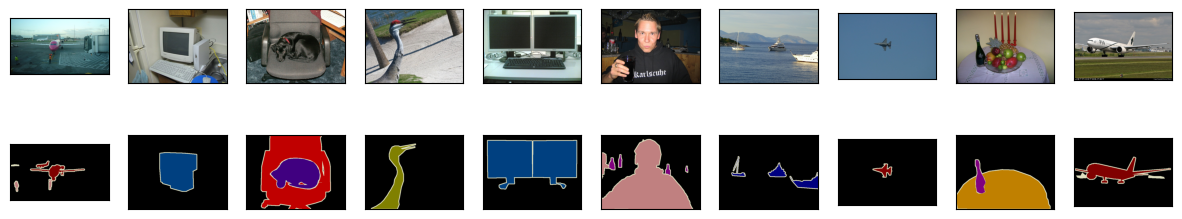

In [17]:
n=10
imgs=train_features[0:n]+train_labels[0:n]
imgs=[img.permute(1,2,0) for img in imgs]
d2l.show_images(imgs,2,n)

In [9]:
VOC_COLORMAP = [[0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0],
                [0, 0, 128], [128, 0, 128], [0, 128, 128], [128, 128, 128],
                [64, 0, 0], [192, 0, 0], [64, 128, 0], [192, 128, 0],
                [64, 0, 128], [192, 0, 128], [64, 128, 128], [192, 128, 128],
                [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0],
                [0, 64, 128]]

VOC_CLASSES = ['background', 'aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair', 'cow',
               'diningtable', 'dog', 'horse', 'motorbike', 'person',
               'potted plant', 'sheep', 'sofa', 'train', 'tv/monitor']

In [10]:
def voc_colormap2label():
    #从三个元素值map成一个整数
    colormap2label = torch.zeros(256 ** 3, dtype=torch.long)
    for i, colormap in enumerate(VOC_COLORMAP):
        colormap2label[
            (colormap[0] * 256 + colormap[1]) * 256 + colormap[2]] = i
    return colormap2label#返回一维张量查找表

def voc_label_indices(colormap, colormap2label):
    colormap = colormap.permute(1, 2, 0).numpy().astype('int32')
    idx = ((colormap[:, :, 0] * 256 + colormap[:, :, 1]) * 256
           + colormap[:, :, 2])
    return colormap2label[idx]

In [11]:
y = voc_label_indices(train_labels[0], voc_colormap2label())
y[105:115, 130:140], VOC_CLASSES[1]

(tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]),
 'aeroplane')

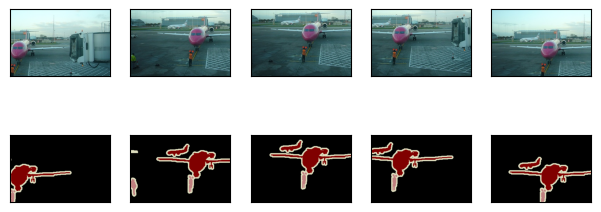

In [12]:
def voc_rand_crop(feature, label, height, width):

    #裁剪区域的位置
    rect = torchvision.transforms.RandomCrop.get_params(
        feature, (height, width))

    #用同样的裁剪区域对原图和标签图做相同位置的裁剪
    feature = torchvision.transforms.functional.crop(feature, *rect)
    label = torchvision.transforms.functional.crop(label, *rect)
    #返回裁剪后的图像和标签图
    return feature, label

imgs = []
for _ in range(n):
    imgs += voc_rand_crop(train_features[0], train_labels[0], 200, 300)

imgs = [img.permute(1, 2, 0) for img in imgs]
d2l.show_images(imgs[::2] + imgs[1::2], 2, n);

In [26]:
class VOCSegDataset(torch.utils.data.Dataset):

    def __init__(self, is_train, crop_size, voc_dir):

        #图像标准化
        self.transform = torchvision.transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

        self.crop_size = crop_size

        #将图像和标签存入内存
        features, labels = read_voc_images(voc_dir, is_train=is_train)

        #只做尺寸筛选--舍弃小图片
        self.features = [self.normalize_image(feature)
                         for feature in self.filter(features)]
        self.labels = self.filter(labels)
        self.colormap2label = voc_colormap2label()
        print('read ' + str(len(self.features)) + ' examples')

    def normalize_image(self, img):
        return self.transform(img.float() / 255)

    #假设图片比裁剪的尺寸小 则略去
    def filter(self, imgs):
        return [img for img in imgs if (
            img.shape[1] >= self.crop_size[0] and
            img.shape[2] >= self.crop_size[1])]

    #返回样本做一次随机裁剪
    def __getitem__(self, idx):
        feature, label = voc_rand_crop(self.features[idx], self.labels[idx],
                                       *self.crop_size)
        return (feature, voc_label_indices(label, self.colormap2label))

    def __len__(self):
        return len(self.features)

In [ ]:
crop_size = (320, 480)#被裁减后图像与标签图的最终大小
voc_train = VOCSegDataset(True, crop_size, voc_dir)
voc_test = VOCSegDataset(False, crop_size, voc_dir)

In [ ]:
batch_size = 64
train_iter = torch.utils.data.DataLoader(
    voc_train, batch_size, shuffle=True,
    drop_last=True,
    num_workers=d2l.get_dataloader_workers())

for X, Y in train_iter:
    print(X.shape)
    print(Y.shape)
    break

In [ ]:
def load_data_voc(batch_size, crop_size):
    """加载VOC语义分割数据集"""
    voc_dir = d2l.download_extract('voc2012', os.path.join(
        'VOCdevkit', 'VOC2012'))
    num_workers = d2l.get_dataloader_workers()
    train_iter = torch.utils.data.DataLoader(
        VOCSegDataset(True, crop_size, voc_dir), batch_size,
        shuffle=True, drop_last=True, num_workers=num_workers)
    test_iter = torch.utils.data.DataLoader(
        VOCSegDataset(False, crop_size, voc_dir), batch_size,
        drop_last=True, num_workers=num_workers)
    return train_iter, test_iter